### R调用Apriori算法
主要通过[`arules`库](https://pdfs.semanticscholar.org/da0f/6a6100ca47c890054b6a8d86fa64212a26ef.pdf?_ga=2.195832815.2101660601.1557072844-600015335.1557072844)完成算法的调用，此外利用[`arulesViz`库](https://pdfs.semanticscholar.org/758c/9e6d4b07f9cf77571f7d9dd0f16dbe5c2824.pdf?_ga=2.220401243.2101660601.1557072844-600015335.1557072844)完成可视化的任务。一下示例来自两库论文。

#### Example1: Analyzing and preparing a transaction data set

In [1]:
library("arules")
data("Epub")

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



In [2]:
str(Epub)
head(Epub, 3)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:25893] 7 199 31 0 64 935 422 0 194 0 ...
  .. .. ..@ p       : int [1:15730] 0 1 2 3 6 7 8 9 11 12 ...
  .. .. ..@ Dim     : int [1:2] 936 15729
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	936 obs. of  1 variable:
  .. ..$ labels: chr [1:936] "doc_11d" "doc_13d" "doc_14c" "doc_14e" ...
  ..@ itemsetInfo:'data.frame':	15729 obs. of  2 variables:
  .. ..$ transactionID: chr [1:15729] "session_4795" "session_4797" "session_479a" "session_47b7" ...
  .. ..$ TimeStamp    : POSIXct[1:15729], format: "2003-01-02 09:59:00" "2003-01-02 20:46:01" ...


transactions in sparse format with
 3 transactions (rows) and
 936 items (columns)

In [3]:
summary(Epub)

transactions as itemMatrix in sparse format with
 15729 rows (elements/itemsets/transactions) and
 936 columns (items) and a density of 0.001758755 

most frequent items:
doc_11d doc_813 doc_4c6 doc_955 doc_698 (Other) 
    356     329     288     282     245   24393 

element (itemset/transaction) length distribution:
sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
11615  2189   854   409   198   121    93    50    42    34    26    12    10 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
   10     6     8     6     5     8     2     2     3     2     3     4     5 
   27    28    30    34    36    38    41    43    52    58 
    1     1     1     2     1     2     1     1     1     1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.646   2.000  58.000 

includes extended item information - examples:
   labels
1 doc_11d
2 doc_13d
3 doc_14c

includes extended transaction information - exa

In [4]:
# 选取其中某一年的数据
year <- strftime(as.POSIXlt(transactionInfo(Epub)[["TimeStamp"]]), "%Y")
Epub2003 <- Epub[year == "2003"]
length(Epub2003)

[1] 986

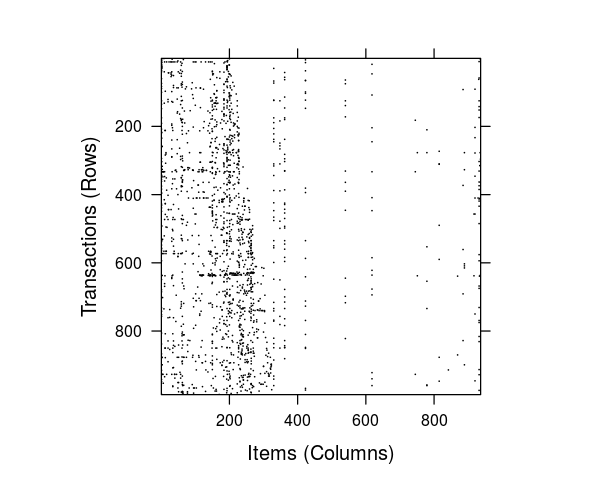

In [5]:
options(repr.plot.width=5, repr.plot.height=4)
image(Epub2003, lwd=1)

In [6]:
# find the very long transactions
transactionInfo(Epub2003[size(Epub2003) > 20])

,transactionID,TimeStamp
,<chr>,<dttm>
11092,session_56e2,2003-04-30 01:30:38
11371,session_6308,2003-08-18 06:16:12


In [7]:
# 查看“购物篮”(transaction)中的“商品”(items)
inspect(Epub2003[1:5])

    items                    transactionID TimeStamp          
[1] {doc_154}                session_4795  2003-01-02 09:59:00
[2] {doc_3d6}                session_4797  2003-01-02 20:46:01
[3] {doc_16f}                session_479a  2003-01-02 23:50:38
[4] {doc_11d,doc_1a7,doc_f4} session_47b7  2003-01-03 07:55:50
[5] {doc_83}                 session_47bb  2003-01-03 10:27:44


#### Example2: Preparing and mining a questionnaire data set

In [8]:
data("AdultUCI")
dim(AdultUCI)

[1] 48842    15

In [9]:
AdultUCI[1:2, ]

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
<int>,<fct>,<int>,<ord>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<ord>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small


In [10]:
# 去除无用变量
AdultUCI[["fnlwgt"]] <- NULL
AdultUCI[["education-num"]] <- NULL

In [11]:
# 将一些连续变量转化为有序变量
AdultUCI[["age"]] <- ordered(cut(AdultUCI[["age"]], 
                                 c(15, 25, 45, 65, 100)), 
                                 labels = c("Young", "Middle-aged", "Senior", "Old"))

AdultUCI[["hours-per-week"]] <- ordered(cut(AdultUCI[["hours-per-week"]], 
                                            c(0, 25, 40, 60, 168)), 
                                            labels = c("Part-time", "Full-time","Over-time", "Workaholic"))

AdultUCI[["capital-gain"]] <- ordered(cut(AdultUCI[["capital-gain"]],
                                          c(-Inf, 0, median(AdultUCI[["capital-gain"]][AdultUCI[["capital-gain"]] > 0]), Inf)), 
                                          labels = c("None", "Low", "High"))

AdultUCI[["capital-loss"]] <- ordered(cut(AdultUCI[["capital-loss"]],
                                          c(-Inf, 0, median(AdultUCI[["capital-loss"]][AdultUCI[["capital-loss"]] > 0]), Inf)),
                                          labels = c("none", "low", "high"))

In [12]:
# 转化为transactions格式数据
Adult <- as(AdultUCI, "transactions")
Adult

transactions in sparse format with
 48842 transactions (rows) and
 115 items (columns)

In [13]:
summary(Adult)

transactions as itemMatrix in sparse format with
 48842 rows (elements/itemsets/transactions) and
 115 columns (items) and a density of 0.1089939 

most frequent items:
           capital-loss=none            capital-gain=None 
                       46560                        44807 
native-country=United-States                   race=White 
                       43832                        41762 
           workclass=Private                      (Other) 
                       33906                       401333 

element (itemset/transaction) length distribution:
sizes
    9    10    11    12    13 
   19   971  2067 15623 30162 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   12.00   13.00   12.53   13.00   13.00 

includes extended item information - examples:
           labels variables      levels
1       age=Young       age       Young
2 age=Middle-aged       age Middle-aged
3      age=Senior       age      Senior

includes extended transaction information - examp

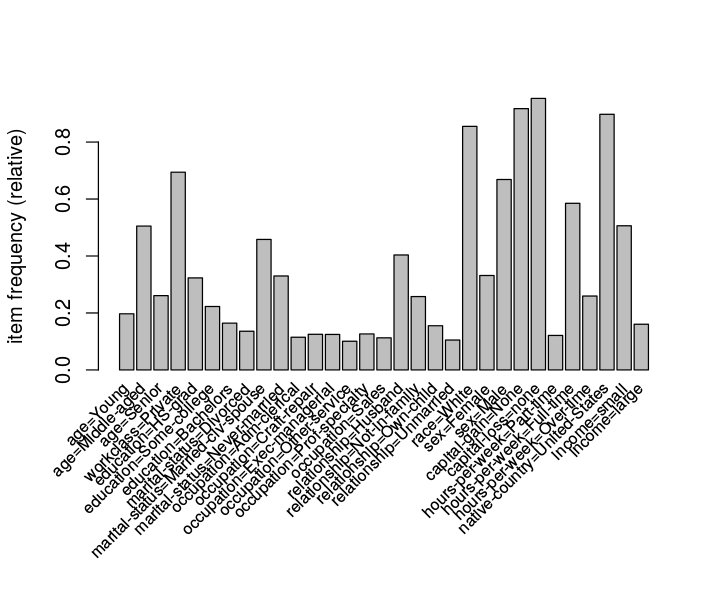

In [14]:
options(repr.plot.width=6, repr.plot.height=5)
itemFrequencyPlot(Adult, support = 0.1, cex.names = 0.8)

In [15]:
rules <- apriori(Adult, parameter = list(support = 0.01, confidence = 0.6))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 488 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[115 item(s), 48842 transaction(s)] done [0.05s].
sorting and recoding items ... [67 item(s)] done [0.01s].
creating transaction tree ... done [0.05s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(Adult, parameter = list(support = 0.01, confidence = 0.6)):
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”

 done [0.92s].
writing ... [276443 rule(s)] done [0.06s].
creating S4 object  ... done [0.09s].


In [16]:
rules

set of 276443 rules 

In [17]:
summary(rules)

set of 276443 rules

rule length distribution (lhs + rhs):sizes
    1     2     3     4     5     6     7     8     9    10 
    6   432  4981 22127 52669 75104 67198 38094 13244  2588 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.000   6.000   6.289   7.000  10.000 

summary of quality measures:
    support          confidence          lift             count      
 Min.   :0.01001   Min.   :0.6000   Min.   : 0.7171   Min.   :  489  
 1st Qu.:0.01253   1st Qu.:0.7691   1st Qu.: 1.0100   1st Qu.:  612  
 Median :0.01701   Median :0.9051   Median : 1.0554   Median :  831  
 Mean   :0.02679   Mean   :0.8600   Mean   : 1.3109   Mean   : 1308  
 3rd Qu.:0.02741   3rd Qu.:0.9542   3rd Qu.: 1.2980   3rd Qu.: 1339  
 Max.   :0.95328   Max.   :1.0000   Max.   :20.6826   Max.   :46560  

mining info:
  data ntransactions support confidence
 Adult         48842    0.01        0.6

In [18]:
# 规则的筛选
rulesIncomeSmall <- subset(rules, subset = rhs %in% "income=small" & lift > 1.2)
rulesIncomeLarge <- subset(rules, subset = rhs %in% "income=large" & lift > 1.2)

In [19]:
# 注意这里使用论文中的“SORT”会报错，改为"sort"
inspect(sort(rulesIncomeSmall, by = "confidence")[1:3])

    lhs                               rhs               support confidence     lift count
[1] {workclass=Private,                                                                  
     marital-status=Never-married,                                                       
     relationship=Own-child,                                                             
     sex=Male,                                                                           
     hours-per-week=Part-time,                                                           
     native-country=United-States} => {income=small} 0.01074895  0.7104195 1.403653   525
[2] {workclass=Private,                                                                  
     marital-status=Never-married,                                                       
     relationship=Own-child,                                                             
     sex=Male,                                                                           
     hours

In [20]:
inspect(sort(rulesIncomeLarge, by = "confidence")[1:3])

    lhs                                    rhs               support confidence     lift count
[1] {marital-status=Married-civ-spouse,                                                       
     capital-gain=High,                                                                       
     native-country=United-States}      => {income=large} 0.01562180  0.6849192 4.266398   763
[2] {marital-status=Married-civ-spouse,                                                       
     capital-gain=High,                                                                       
     capital-loss=none,                                                                       
     native-country=United-States}      => {income=large} 0.01562180  0.6849192 4.266398   763
[3] {relationship=Husband,                                                                    
     race=White,                                                                              
     capital-gain=High,                           

#### Plot it!

参考`arulesViz`论文及[`Rpubs`](https://rpubs.com/dnchari/associationRules)

In [21]:
library(arulesViz)

Loading required package: grid
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


##### Support, Confidence and Lift

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


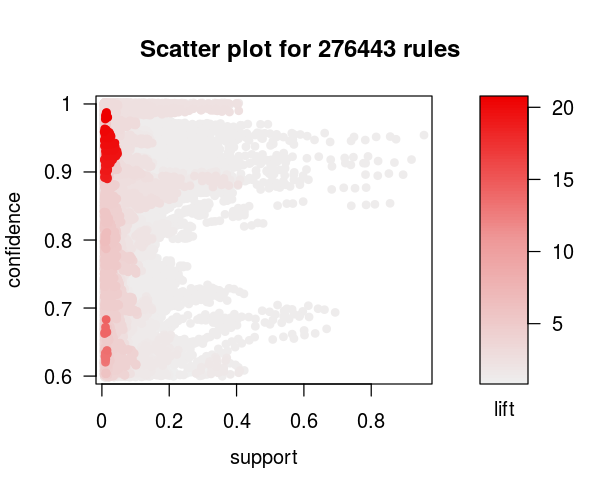

In [22]:
options(repr.plot.width=5, repr.plot.height=4)
plot(rules)

In [23]:
head(quality(rules))

support,confidence,lift,count
<dbl>,<dbl>,<dbl>,<dbl>
0.6684820,0.6684820,1,32650
0.6941976,0.6941976,1,33906
0.8550428,0.8550428,1,41762
0.8974243,0.8974243,1,43832
0.9173867,0.9173867,1,44807
0.9532779,0.9532779,1,46560


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


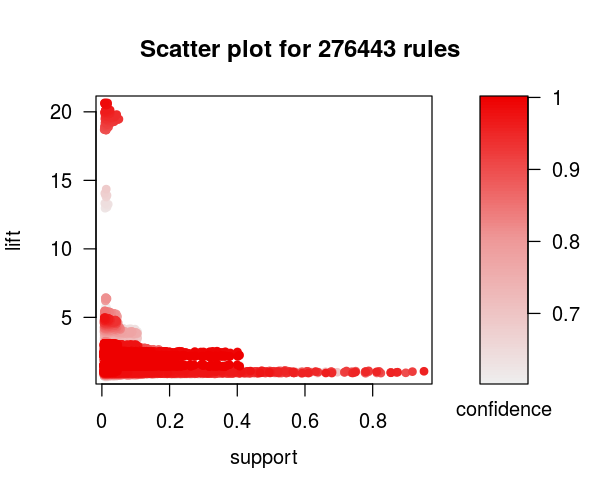

In [24]:
# 改变座标轴
plot(rules, measure=c("support", "lift"), shading="confidence")

##### Two-Key Plot
>the color of the points is used to indicate “order,” i.e., the number of items contained in the rule. 

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


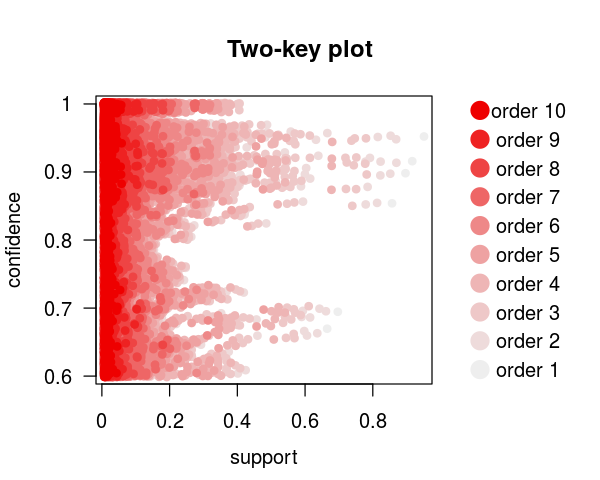

In [25]:
plot(rules, shading="order", control=list(main = "Two-key plot"))

##### 交互探索模式
在`Jupyter`中好像无法调用交互模式，终端是可以的，论文给出的示例代码为

`plot(rules, measure=c("support", "lift"), shading="confidence", interactive = TRUE)`

##### Matrix-based visualizations

In [26]:
subrules <- rules[quality(rules)$confidence > 0.8 & quality(rules)$support > 0.4]
subrules

set of 169 rules 

Itemsets in Antecedent (LHS)
 [1] "{marital-status=Married-civ-spouse,sex=Male}"                                        
 [2] "{relationship=Husband,sex=Male}"                                                     
 [3] "{relationship=Husband}"                                                              
 [4] "{marital-status=Married-civ-spouse,relationship=Husband}"                            
 [5] "{marital-status=Married-civ-spouse}"                                                 
 [6] "{sex=Male,capital-gain=None,capital-loss=none,native-country=United-States}"         
 [7] "{capital-loss=none,native-country=United-States,income=small}"                       
 [8] "{native-country=United-States,income=small}"                                         
 [9] "{race=White,income=small}"                                                           
[10] "{workclass=Private,capital-gain=None,capital-loss=none,native-country=United-States}"
[11] "{race=White,capital-gain=None,capital-loss=no

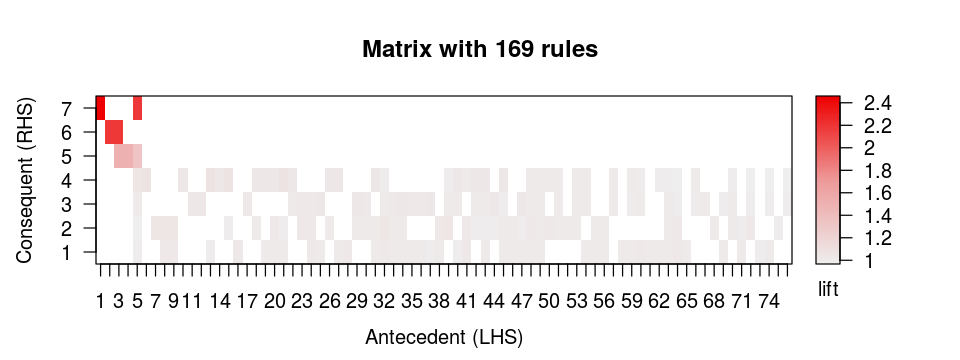

In [27]:
options(repr.plot.width=8, repr.plot.height=3)
plot(subrules, method = "matrix", measure = "lift")

Itemsets in Antecedent (LHS)
 [1] "{marital-status=Married-civ-spouse,sex=Male}"                                        
 [2] "{relationship=Husband,sex=Male}"                                                     
 [3] "{relationship=Husband}"                                                              
 [4] "{marital-status=Married-civ-spouse,relationship=Husband}"                            
 [5] "{marital-status=Married-civ-spouse}"                                                 
 [6] "{sex=Male,capital-gain=None,capital-loss=none,native-country=United-States}"         
 [7] "{capital-loss=none,native-country=United-States,income=small}"                       
 [8] "{native-country=United-States,income=small}"                                         
 [9] "{race=White,income=small}"                                                           
[10] "{workclass=Private,capital-gain=None,capital-loss=none,native-country=United-States}"
[11] "{race=White,capital-gain=None,capital-loss=no

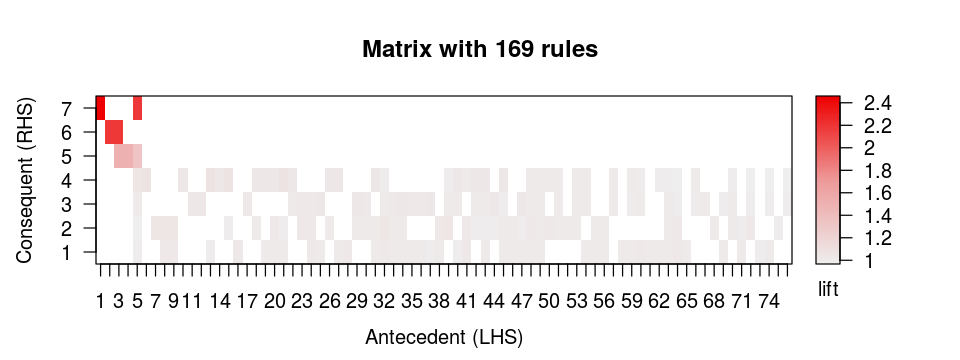

In [28]:
plot(subrules, method = "matrix", measure = "lift", control=list(reorder='measure'))

注意，这里关于排序的参数相对论文有了改变，按照论文使用`reorder=TRUE`会报错

`Error in matrix_int(rules, measure, control, ...): Unknown reorder method: ‘TRUE’ Valid reorder methods are: ‘none’, ‘measure’, ‘support/confidence’, ‘similarity’`

也就是说，我们现在需要指定用于排序的数据。

Itemsets in Antecedent (LHS)
 [1] "{marital-status=Married-civ-spouse,sex=Male}"                                        
 [2] "{relationship=Husband,sex=Male}"                                                     
 [3] "{relationship=Husband}"                                                              
 [4] "{marital-status=Married-civ-spouse,relationship=Husband}"                            
 [5] "{marital-status=Married-civ-spouse}"                                                 
 [6] "{sex=Male,capital-gain=None,capital-loss=none,native-country=United-States}"         
 [7] "{capital-loss=none,native-country=United-States,income=small}"                       
 [8] "{native-country=United-States,income=small}"                                         
 [9] "{race=White,income=small}"                                                           
[10] "{workclass=Private,capital-gain=None,capital-loss=none,native-country=United-States}"
[11] "{race=White,capital-gain=None,capital-loss=no

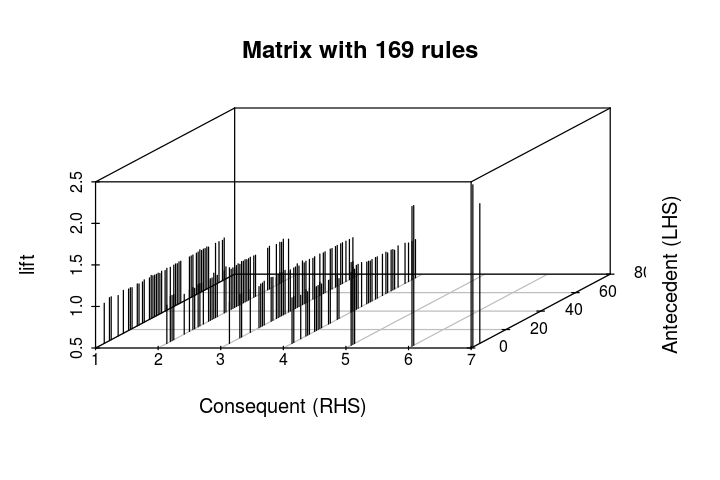

In [29]:
# 3D模式
options(repr.plot.width=6, repr.plot.height=4)
plot(subrules, method="matrix", engine = "3d", measure="lift", control=list(reorder="measure"))

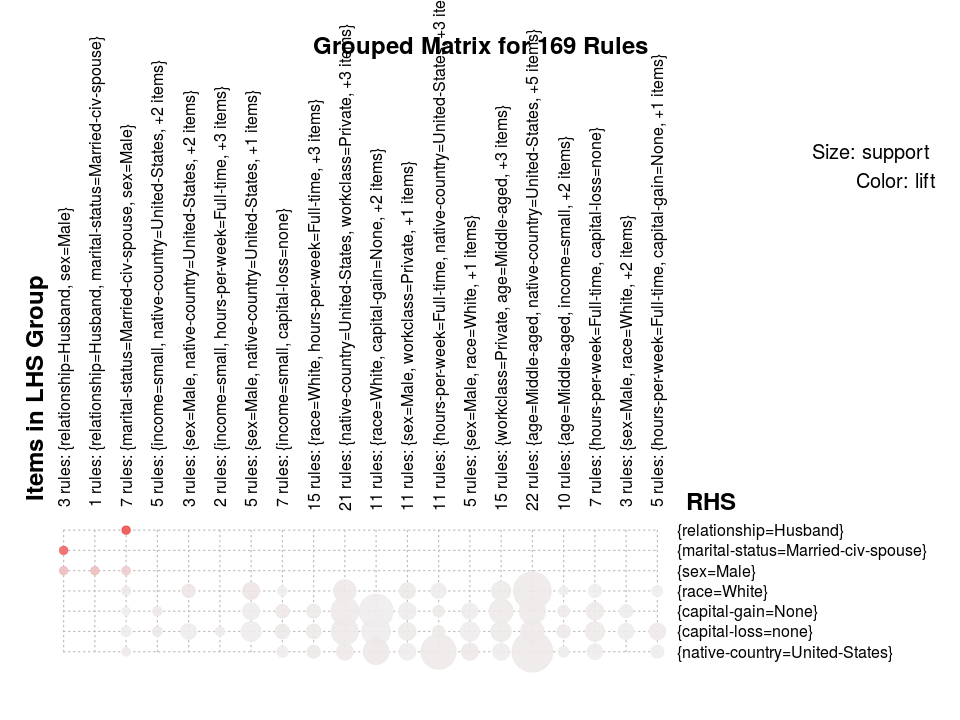

In [65]:
plot(subrules, method="grouped")

##### Graph-based visualizations

In [46]:
subrules2 <- head(sort(rules, by="lift"), 10)

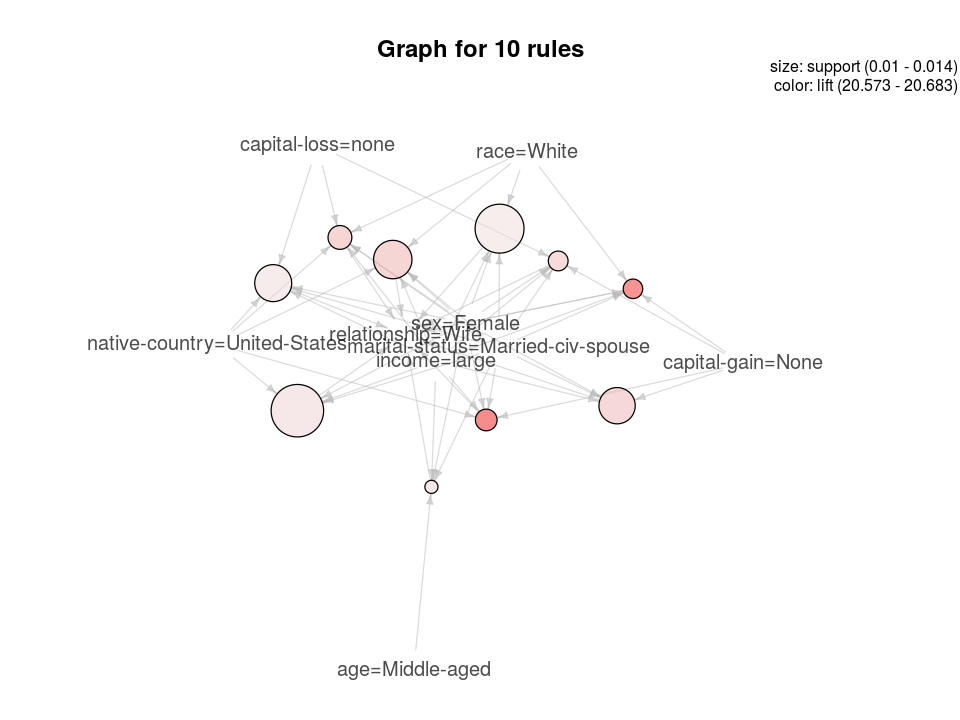

In [59]:
options(repr.plot.width=8, repr.plot.height=6)
plot(subrules2, method="graph")

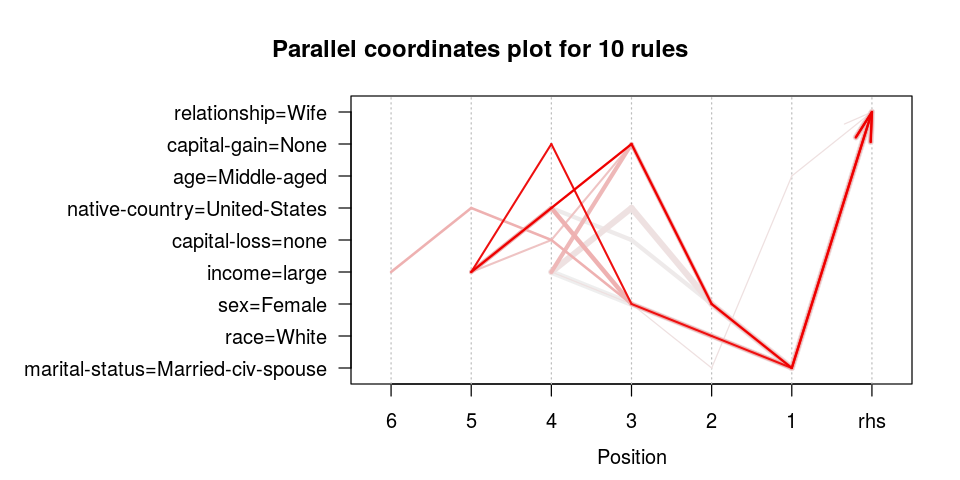

In [57]:
options(repr.plot.width=8, repr.plot.height=4)
plot(subrules2, method="paracoord")

In [63]:
inspect(subrules2[1])

    lhs                                    rhs                    support confidence     lift count
[1] {marital-status=Married-civ-spouse,                                                            
     sex=Female,                                                                                   
     capital-gain=None,                                                                            
     native-country=United-States,                                                                 
     income=large}                      => {relationship=Wife} 0.01095369  0.9870849 20.68263   535


关于上图，线条的粗细代表`support`的大小，颜色的深浅代表`confidence`的大小。此外，`Position`为rule中item的顺序。比如上图最粗的一条折线（代表一个rule），其lhs为

`{marital-status=Married-civ-spouse, sex=Female,capital-gain=None,native-country=United-States,income=large}`

故其对应的`Position`在1处为`marital-status=Married-civ-spouse`，其他几个位置类似。